In [1]:
import tensorflow as tf
import keras
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

x_train, x_test = x_train/255., x_test/255.

x_train_scaled = (x_train-x_train.mean(axis=0))/x_train.std(axis=0)

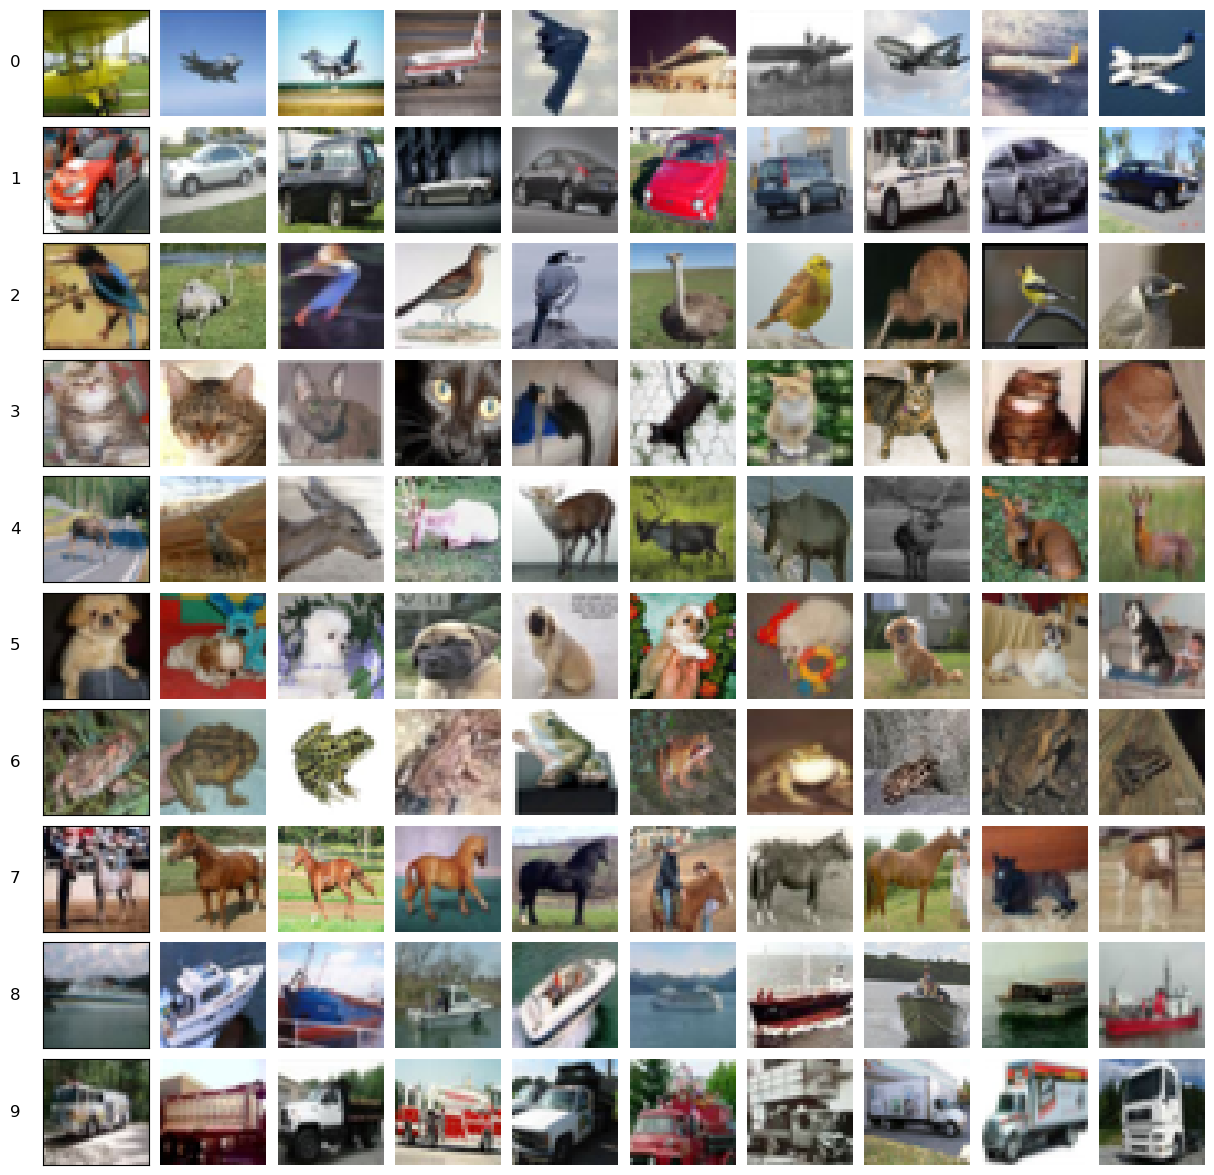

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Assuming y_train and x_train are defined and contain the labels and images respectively.
unique_labels = np.unique(y_train)
num_images_per_class = 10

# Create a dictionary to store random indices for each class
random_indices = {label: [] for label in unique_labels}

for label in unique_labels:
    label_indices = np.where(y_train == label)[0]
    random_indices[label] = random.sample(list(label_indices), num_images_per_class)

# Plot the images
fig, axes = plt.subplots(len(unique_labels), num_images_per_class, figsize=(15, 15))

for class_idx, label in enumerate(unique_labels):
    for i, idx in enumerate(random_indices[label]):
        x_inst = x_train[idx]
        
        ax = axes[class_idx, i]
        ax.imshow(x_inst)
        
        # Add class label on the left side of each row
        if i == 0:
            ax.set_ylabel(label, rotation=0, size='large', labelpad=20, verticalalignment='center')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# A) Build a DNN with 20 hidden layers of 100 neurons each - this will be too many

In [3]:
tf.random.set_seed(42)

keras.backend.clear_session()

model = keras.models.Sequential()

input_ = keras.Input(shape=x_train[0].shape)
norm_layer = keras.layers.Normalization()
he_initializer = keras.initializers.HeNormal()


model.add(input_)
model.add(norm_layer)

model.add(keras.layers.Flatten())

for _ in range(20):
    model.add(keras.layers.Dense(100, activation='swish', kernel_initializer=he_initializer))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 32, 32, 3)      │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 499,207 (1.90 MB)

 Trainable params: 499,200 (1.90 MB)

 Non-trainable params: 7 (32.00 B)

# b) Use Nadam optimization and early stopping to train the network

In [4]:
from pathlib import Path

output = keras.layers.Dense(10, activation='softmax')
model.add(output)

nadam = keras.optimizers.Nadam(learning_rate=5e-5)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=.05, patience=15, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('my_cifar10_model.keras', save_best_only=True)

run_index = 2 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

callbacks = [early_stopping, model_checkpoint, tensorboard_cb]

scce = keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=nadam, loss=scce, metrics=['accuracy'])

model.fit(x=x_train, y=y_train, callbacks=callbacks, validation_split=.2, epochs=100)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1960 - loss: 2.1452 - val_accuracy: 0.3183 - val_loss: 1.8571
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3253 - loss: 1.8297 - val_accuracy: 0.3530 - val_loss: 1.7593
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3688 - loss: 1.7246 - val_accuracy: 0.3922 - val_loss: 1.6773
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4010 - loss: 1.6506 - val_accuracy: 0.4105 - val_loss: 1.6299
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4203 - loss: 1.5992 - val_accuracy: 0.4240 - val_loss: 1.5965
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4335 - loss: 1.5601 - val_accuracy: 0.4326 - val_loss: 1.5734
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4463 - loss: 1.5285 - val_accuracy: 0.4381 - val_loss: 1.5565
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4561 - loss: 1

# c) add batch normalization

In [5]:
keras.backend.clear_session()
model = keras.models.Sequential()

